# 关系拟合 回归

In [87]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
%matplotlib notebook
import matplotlib.pyplot as plt

In [57]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) #一维转二维
y = x.pow(2) + 0.2*torch.rand(x.size()) #加入噪点影响

In [58]:
x, y = Variable(x), Variable(y)

<IPython.core.display.Javascript object>


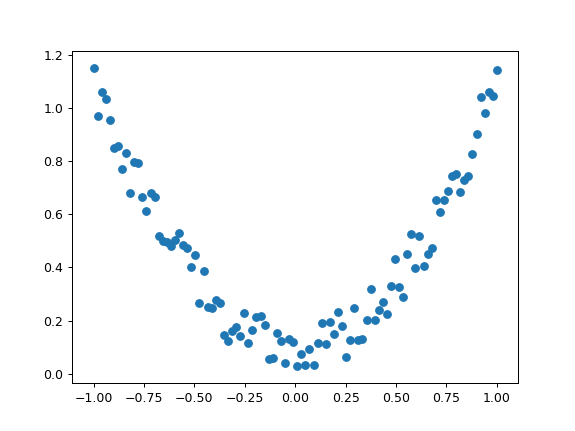

In [59]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [103]:
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_features, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [104]:
net = Net(1, 10, 1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [105]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()

<IPython.core.display.Javascript object>


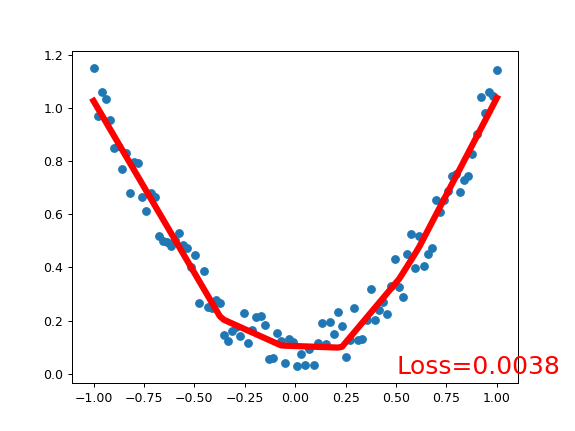

In [109]:
plt.figure()
plt.ion()
plt.show()
for t in range(100):
    prediction = net(x)
    
    loss = loss_func(prediction, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t % 5 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data, fontdict={'size': 20, 'color': 'red'})
        #plt.pause(0.1)
plt.ioff()
plt.show()

<IPython.core.display.Javascript object>


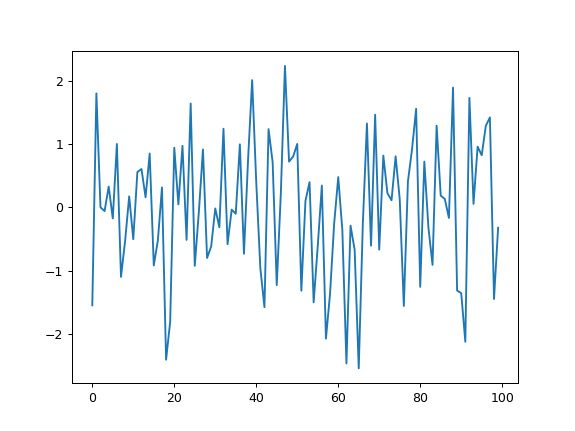

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [81]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

m = 100
n = 100
matrix = np.random.normal(0,1,m*n).reshape(m,n)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,100):
    ax.clear()
    ax.plot(matrix[i,:])
    fig.canvas.draw()